In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error
pd.set_option('display.max_columns', None)

In [235]:
main_df1 = pd.read_csv("../data/raw/my_8month2025.csv")
main_df2 = pd.read_csv("../data/raw/ems_2024.csv")

In [236]:
main_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1079491 non-null  int64  
 1   incident_datetime               1079491 non-null  object 
 2   initial_call_type               1079491 non-null  object 
 3   initial_severity_level_code     1079491 non-null  int64  
 4   final_call_type                 1079491 non-null  object 
 5   final_severity_level_code       1079491 non-null  int64  
 6   first_assignment_datetime       1056283 non-null  object 
 7   valid_dispatch_rspns_time_indc  1079491 non-null  object 
 8   dispatch_response_seconds_qy    1079491 non-null  int64  
 9   first_activation_datetime       1054306 non-null  object 
 10  first_on_scene_datetime         1014350 non-null  object 
 11  valid_incident_rspns_time_indc  1079491 non-null  object 
 12  

In [237]:
main_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600996 entries, 0 to 1600995
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1600996 non-null  int64  
 1   incident_datetime               1600996 non-null  object 
 2   initial_call_type               1600996 non-null  object 
 3   initial_severity_level_code     1600996 non-null  int64  
 4   final_call_type                 1600996 non-null  object 
 5   final_severity_level_code       1600996 non-null  int64  
 6   first_assignment_datetime       1571740 non-null  object 
 7   valid_dispatch_rspns_time_indc  1600996 non-null  object 
 8   dispatch_response_seconds_qy    1600996 non-null  int64  
 9   first_activation_datetime       1568623 non-null  object 
 10  first_on_scene_datetime         1511169 non-null  object 
 11  valid_incident_rspns_time_indc  1600996 non-null  object 
 12  

In [238]:
main_df1.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_travel_tm_seconds_qy',
       'incident_close_datetime', 'held_indicator',
       'incident_disposition_code', 'borough', 'incident_dispatch_area',
       'zipcode', 'policeprecinct', 'citycouncildistrict', 'communitydistrict',
       'communityschooldistrict', 'congressionaldistrict', 'reopen_indicator',
       'special_event_indicator', 'standby_indicator', 'transfer_indicator',
       'incident_response_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime'],
      dtype='object')

In [239]:
main_df2.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime'],
      dtype='object')

In [240]:
main_df = pd.concat([main_df1, main_df2], ignore_index=True)

In [241]:
main_df.head()

,cad_incident_id,incident_datetime,initial_call_type,initial_severity_level_code,final_call_type,final_severity_level_code,first_assignment_datetime,valid_dispatch_rspns_time_indc,dispatch_response_seconds_qy,first_activation_datetime,first_on_scene_datetime,valid_incident_rspns_time_indc,incident_travel_tm_seconds_qy,incident_close_datetime,held_indicator,incident_disposition_code,borough,incident_dispatch_area,zipcode,policeprecinct,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator,incident_response_seconds_qy,first_to_hosp_datetime,first_hosp_arrival_datetime
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,2025-01-01T09:53:56.000,N,15.0,2025-01-01T14:03:04.000,N,91,BROOKLYN,CW,11224.0,60.0,47.0,313.0,21.0,8.0,Y,N,Y,N,NaN,NaN,NaN
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,2025-01-01T00:09:27.000,Y,441.0,2025-01-01T01:32:53.000,N,82,MANHATTAN,M2,10001.0,10.0,3.0,104.0,2.0,10.0,N,N,N,N,454.0,2025-01-01T00:21:01.000,2025-01-01T00:39:03.000
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,2025-01-01T00:01:58.000,Y,0.0,2025-01-01T00:10:49.000,N,93,MANHATTAN,M3,10036.0,14.0,3.0,104.0,2.0,10.0,N,N,N,N,0.0,NaN,NaN
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,2025-01-01T00:14:36.000,Y,637.0,2025-01-01T01:22:42.000,N,82,MANHATTAN,M9,10040.0,34.0,10.0,112.0,6.0,13.0,N,N,N,N,654.0,2025-01-01T00:28:30.000,2025-01-01T00:37:31.000
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,2025-01-01T00:09:20.000,Y,254.0,2025-01-01T01:36:32.000,N,82,BRONX,B4,10466.0,47.0,12.0,212.0,11.0,16.0,N,N,N,N,284.0,2025-01-01T00:40:27.000,2025-01-01T00:50:50.000


In [242]:

#drop_cols = ['travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type']
#main_drop_cols = ['incident_response_sec','travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type'] 

In [243]:
drop_cols = ["incident_travel_tm_seconds_qy","dispatch_response_seconds_qy","incident_close_datetime","first_hosp_arrival_datetime", "first_to_hosp_datetime","first_on_scene_datetime","first_activation_datetime","first_assignment_datetime","final_severity_level_code","final_call_type"]



In [244]:
main_df = main_df.drop(columns=drop_cols)

In [245]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cad_incident_id                 int64  
 1   incident_datetime               object 
 2   initial_call_type               object 
 3   initial_severity_level_code     int64  
 4   valid_dispatch_rspns_time_indc  object 
 5   valid_incident_rspns_time_indc  object 
 6   held_indicator                  object 
 7   incident_disposition_code       object 
 8   borough                         object 
 9   incident_dispatch_area          object 
 10  zipcode                         float64
 11  policeprecinct                  float64
 12  citycouncildistrict             float64
 13  communitydistrict               float64
 14  communityschooldistrict         float64
 15  congressionaldistrict           float64
 16  reopen_indicator                object 
 17  special_event_indicator    

In [246]:
main_df.isna().sum()

cad_incident_id                        0
incident_datetime                      0
initial_call_type                      0
initial_severity_level_code            0
valid_dispatch_rspns_time_indc         0
valid_incident_rspns_time_indc         0
held_indicator                         0
incident_disposition_code              0
borough                                0
incident_dispatch_area                 0
zipcode                            45889
policeprecinct                     45802
citycouncildistrict                45802
communitydistrict                  45804
communityschooldistrict            47714
congressionaldistrict              45802
reopen_indicator                       0
special_event_indicator                0
standby_indicator                      0
transfer_indicator                     0
incident_response_seconds_qy      155559
dtype: int64

In [247]:
main_df['cad_incident_id']

0          250010001
1          250010003
2          250010004
3          250010007
4          250010008
             ...    
2680482    243660212
2680483    243660214
2680484    243660215
2680485    243660217
2680486    243660218
Name: cad_incident_id, Length: 2680487, dtype: int64

In [248]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cad_incident_id                 int64  
 1   incident_datetime               object 
 2   initial_call_type               object 
 3   initial_severity_level_code     int64  
 4   valid_dispatch_rspns_time_indc  object 
 5   valid_incident_rspns_time_indc  object 
 6   held_indicator                  object 
 7   incident_disposition_code       object 
 8   borough                         object 
 9   incident_dispatch_area          object 
 10  zipcode                         float64
 11  policeprecinct                  float64
 12  citycouncildistrict             float64
 13  communitydistrict               float64
 14  communityschooldistrict         float64
 15  congressionaldistrict           float64
 16  reopen_indicator                object 
 17  special_event_indicator    

In [249]:
main_df['incident_datetime'] = pd.to_datetime(
    main_df['incident_datetime'],
    format='mixed'
)

In [250]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   cad_incident_id                 int64         
 1   incident_datetime               datetime64[ns]
 2   initial_call_type               object        
 3   initial_severity_level_code     int64         
 4   valid_dispatch_rspns_time_indc  object        
 5   valid_incident_rspns_time_indc  object        
 6   held_indicator                  object        
 7   incident_disposition_code       object        
 8   borough                         object        
 9   incident_dispatch_area          object        
 10  zipcode                         float64       
 11  policeprecinct                  float64       
 12  citycouncildistrict             float64       
 13  communitydistrict               float64       
 14  communityschooldistrict         float64       
 15

In [251]:
main_df['incident_datetime'].isna().sum()

np.int64(0)

In [252]:
main_df['incident_datetime'].sample(10)

1057969   2025-08-26 23:34:54
1962834   2024-07-22 11:40:35
668055    2025-06-02 15:18:45
791854    2025-06-29 01:16:43
505840    2025-04-27 05:49:02
1247027   2024-02-08 19:58:02
1273492   2024-02-15 02:17:08
2420891   2024-11-01 18:33:43
2503528   2024-11-22 12:30:44
1860094   2024-06-28 17:49:05
Name: incident_datetime, dtype: datetime64[ns]

In [253]:
main_df['incident_datetime'].sort_values(ascending=True)

1079491   2024-01-01 00:00:03
1079492   2024-01-01 00:00:14
1079493   2024-01-01 00:00:18
1079494   2024-01-01 00:00:45
1079495   2024-01-01 00:00:55
                  ...        
1079486   2025-08-31 23:58:45
1079487   2025-08-31 23:58:59
1079488   2025-08-31 23:59:22
1079489   2025-08-31 23:59:52
1079490   2025-08-31 23:59:55
Name: incident_datetime, Length: 2680487, dtype: datetime64[ns]

In [254]:
main_df['incident_datetime'].sort_values(ascending=False)

1079490   2025-08-31 23:59:55
1079489   2025-08-31 23:59:52
1079488   2025-08-31 23:59:22
1079487   2025-08-31 23:58:59
1079486   2025-08-31 23:58:45
                  ...        
1079495   2024-01-01 00:00:55
1079494   2024-01-01 00:00:45
1079493   2024-01-01 00:00:18
1079492   2024-01-01 00:00:14
1079491   2024-01-01 00:00:03
Name: incident_datetime, Length: 2680487, dtype: datetime64[ns]

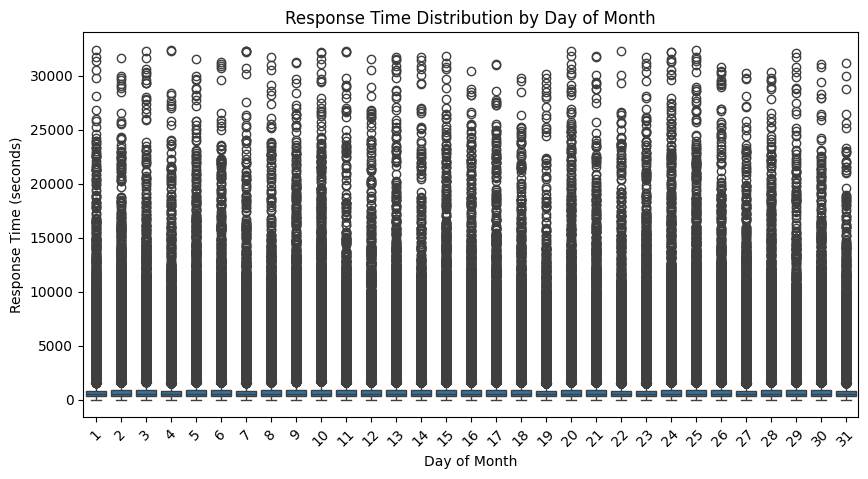

In [255]:
plt.figure(figsize=(10,5))
sns.boxplot(x=main_df['incident_datetime'].dt.day,y=main_df['incident_response_seconds_qy'])
plt.xticks(rotation=45)
plt.title("Response Time Distribution by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Response Time (seconds)")
plt.show()

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

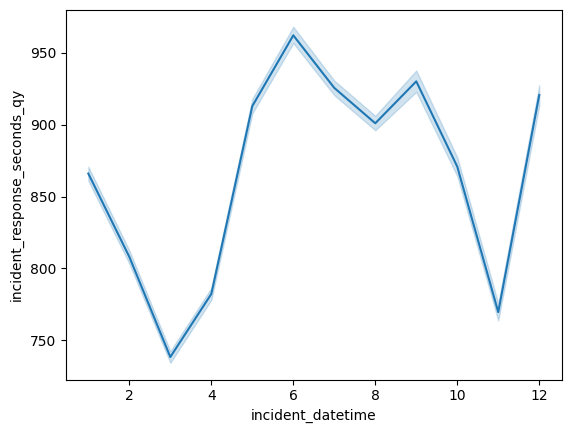

In [256]:
sns.lineplot(
    x=main_df['incident_datetime'].dt.month,
    y=main_df['incident_response_seconds_qy'],
    estimator='mean'
)

In [257]:
main_df.groupby(main_df["incident_datetime"].dt.to_period("M")).size()

incident_datetime
2024-01    134105
2024-02    121680
2024-03    129449
2024-04    126314
2024-05    140611
2024-06    138783
2024-07    139593
2024-08    133068
2024-09    130219
2024-10    138879
2024-11    129544
2024-12    138751
2025-01    138016
2025-02    120301
2025-03    132609
2025-04    132074
2025-05    138231
2025-06    140120
2025-07    142239
2025-08    135901
Freq: M, dtype: int64

In [258]:
time_df = main_df[['incident_datetime', 'incident_response_seconds_qy']]

In [259]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 2 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   incident_datetime             datetime64[ns]
 1   incident_response_seconds_qy  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 MB


In [260]:
time_df.isna().sum()

incident_datetime                    0
incident_response_seconds_qy    155559
dtype: int64

In [261]:
time_df=time_df.set_index('incident_datetime')

In [262]:
time_df

,incident_response_seconds_qy
incident_datetime,
2025-01-01 00:00:12,NaN
2025-01-01 00:01:53,454.0
2025-01-01 00:01:58,0.0
2025-01-01 00:03:42,654.0
2025-01-01 00:04:36,284.0
...,...
2024-12-31 01:02:12,NaN
2024-12-31 01:02:47,550.0
2024-12-31 01:02:55,281.0


In [263]:
(time_df.resample("T").size()).max()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/2167657732.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  (time_df.resample("T").size()).max()


np.int64(23)

In [264]:
time_df.resample("H").size()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/965794262.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_df.resample("H").size()


incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

In [265]:
## incident countsforecast

In [266]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2680487 entries, 2025-01-01 00:00:12 to 2024-12-31 01:04:35
Data columns (total 1 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   incident_response_seconds_qy  float64
dtypes: float64(1)
memory usage: 40.9 MB


In [267]:
time_df.isna().sum()

incident_response_seconds_qy    155559
dtype: int64

In [268]:
hourly_counts = time_df.resample("H").size()
hourly_counts = hourly_counts.to_frame(name="incident_count")


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/1160403121.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [269]:
hourly_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14616 entries, 2024-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   incident_count  14616 non-null  int64
dtypes: int64(1)
memory usage: 228.4 KB


In [270]:
hourly_counts = time_df.resample("H").size()


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/699213276.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [271]:
hourly_counts.isna().sum()


np.int64(0)

In [272]:
hourly_counts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 14616 entries, 2024-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Series name: None
Non-Null Count  Dtype
--------------  -----
14616 non-null  int64
dtypes: int64(1)
memory usage: 228.4 KB


In [273]:
hourly_counts

incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

<Axes: xlabel='incident_datetime'>

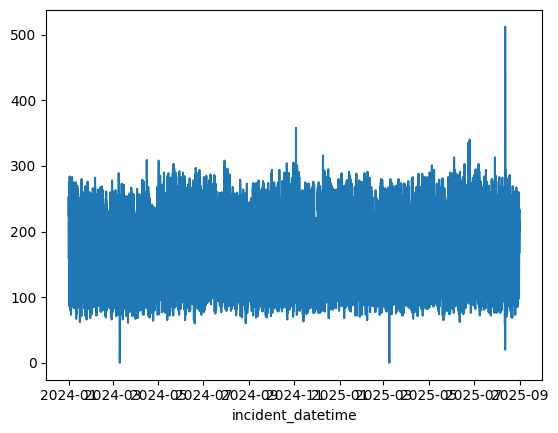

In [274]:
sns.lineplot(data=hourly_counts)

In [275]:
hourly_counts.dtype

dtype('int64')

In [276]:
#hourly_counts.squeeze()

In [277]:
pd.date_range(hourly_counts.index.min(),
              hourly_counts.index.max(),
                freq="H").difference(hourly_counts.index)


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/1843740187.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(hourly_counts.index.min(),


DatetimeIndex([], dtype='datetime64[ns]', freq='h')

<Axes: xlabel='incident_datetime'>

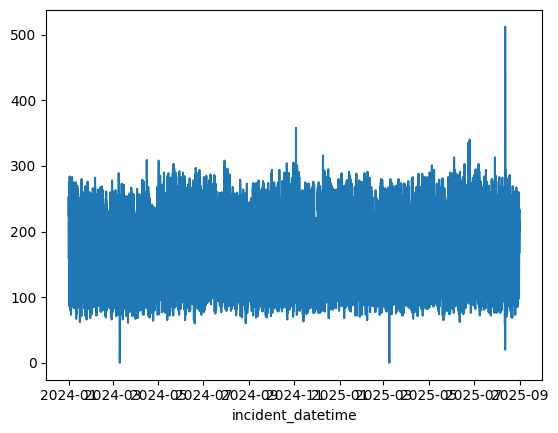

In [278]:
sns.lineplot(data=hourly_counts)

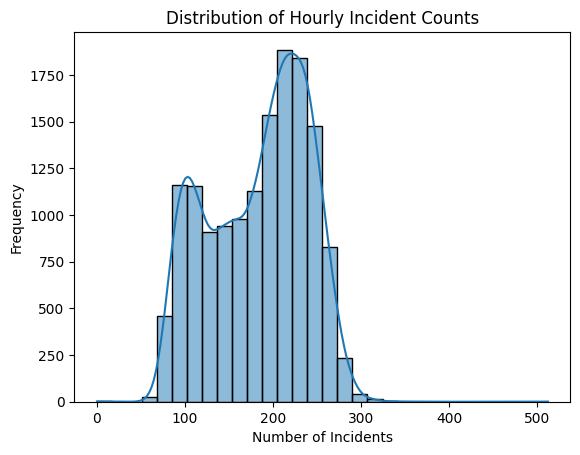

In [279]:
sns.histplot(hourly_counts, bins=30, kde=True)
plt.title("Distribution of Hourly Incident Counts")
plt.xlabel("Number of Incidents")
plt.ylabel("Frequency")
plt.show()

In [280]:
hourly_counts = hourly_counts.sort_index()

In [281]:
hourly_counts

incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

In [282]:
hourly_counts=pd.DataFrame(hourly_counts, columns=['incident_count'])

In [283]:
hourly_counts

,incident_count
incident_datetime,
2024-01-01 00:00:00,224
2024-01-01 01:00:00,253
2024-01-01 02:00:00,217
2024-01-01 03:00:00,186
2024-01-01 04:00:00,168
...,...
2025-08-31 19:00:00,201
2025-08-31 20:00:00,223
2025-08-31 21:00:00,194


In [284]:
hourly_counts['diff'] = hourly_counts['incident_count'].diff()

In [285]:
hourly_counts

,incident_count,diff
incident_datetime,,
2024-01-01 00:00:00,224,NaN
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


In [286]:
hourly_counts.isna().sum()

incident_count    0
diff              1
dtype: int64

In [287]:
hourly_counts = hourly_counts.dropna()

In [288]:
hourly_counts

,incident_count,diff
incident_datetime,,
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
2024-01-01 05:00:00,171,3.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


<Axes: xlabel='incident_datetime', ylabel='incident_count'>

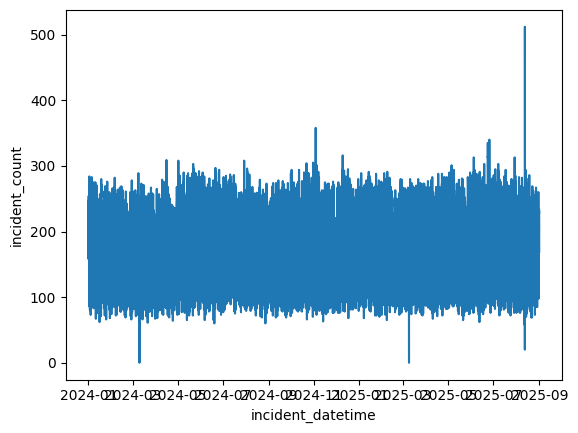

In [289]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='incident_count')

<Axes: xlabel='incident_datetime', ylabel='diff'>

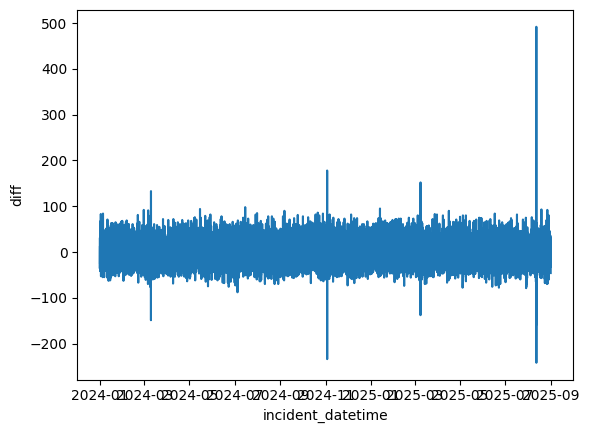

In [290]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='diff')

In [291]:
hourly_counts.index.to_series().diff().value_counts().head()


incident_datetime
0 days 01:00:00    14614
Name: count, dtype: int64

In [292]:
hourly_counts.sort_values(by='diff', ascending=False).head(5)


,incident_count,diff
incident_datetime,,
2025-08-12 13:00:00,512,492.0
2024-11-03 01:00:00,358,178.0
2025-03-09 03:00:00,152,152.0
2024-03-10 03:00:00,133,133.0
2024-07-15 09:00:00,262,98.0


In [293]:

hourly_counts.loc['2025-08-12 11:00:00':'2025-08-12 15:00:00']

,incident_count,diff
incident_datetime,,
2025-08-12 11:00:00,179,-48.0
2025-08-12 12:00:00,20,-159.0
2025-08-12 13:00:00,512,492.0
2025-08-12 14:00:00,270,-242.0
2025-08-12 15:00:00,255,-15.0


Detected an abnormal spike on 2025-08-12 (13:00 = 512 incidents). Likely caused by aggregation or missing hour issue at 12:00. I will verify raw records and check for duplicates before modeling.

In [294]:
check_df = hourly_counts.copy()

In [295]:
check_df

,incident_count,diff
incident_datetime,,
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
2024-01-01 05:00:00,171,3.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


In [296]:
check_df.loc["2025-08-12 11:00:00":"2025-08-12 15:00:00"]


,incident_count,diff
incident_datetime,,
2025-08-12 11:00:00,179,-48.0
2025-08-12 12:00:00,20,-159.0
2025-08-12 13:00:00,512,492.0
2025-08-12 14:00:00,270,-242.0
2025-08-12 15:00:00,255,-15.0


A big spike (+492) happened on 2025-08-12 at 13:00.
The hour before has a very low number (20).
This looks unusual.
I will check the raw data to see if it is real or a data problem

In [297]:
hourly_counts.loc["2025-08-12"]


,incident_count,diff
incident_datetime,,
2025-08-12 00:00:00,170,32.0
2025-08-12 01:00:00,139,-31.0
2025-08-12 02:00:00,118,-21.0
2025-08-12 03:00:00,102,-16.0
2025-08-12 04:00:00,58,-44.0
2025-08-12 05:00:00,91,33.0
2025-08-12 06:00:00,105,14.0
2025-08-12 07:00:00,148,43.0
2025-08-12 08:00:00,189,41.0


In [298]:
hourly_counts.loc["2025-08-12 12:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 00:00:00":"2025-08-12 11:00:00", "incident_count"].median()
hourly_counts.loc["2025-08-12 13:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 14:00:00":"2025-08-12 23:00:00", "incident_count"].median()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/3332993363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '143.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts.loc["2025-08-12 12:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 00:00:00":"2025-08-12 11:00:00", "incident_count"].median()


In [299]:
hourly_counts["diff"] = hourly_counts["incident_count"].diff()


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/3828793010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts["diff"] = hourly_counts["incident_count"].diff()


In [300]:
hourly_counts.loc["2025-08-12"]


,incident_count,diff
incident_datetime,,
2025-08-12 00:00:00,170.0,32.0
2025-08-12 01:00:00,139.0,-31.0
2025-08-12 02:00:00,118.0,-21.0
2025-08-12 03:00:00,102.0,-16.0
2025-08-12 04:00:00,58.0,-44.0
2025-08-12 05:00:00,91.0,33.0
2025-08-12 06:00:00,105.0,14.0
2025-08-12 07:00:00,148.0,43.0
2025-08-12 08:00:00,189.0,41.0


In [301]:
hourly_counts['incident_count120'] = hourly_counts['incident_count'].rolling(120).mean()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/2300771520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts['incident_count120'] = hourly_counts['incident_count'].rolling(120).mean()


<Axes: xlabel='incident_datetime', ylabel='incident_count120'>

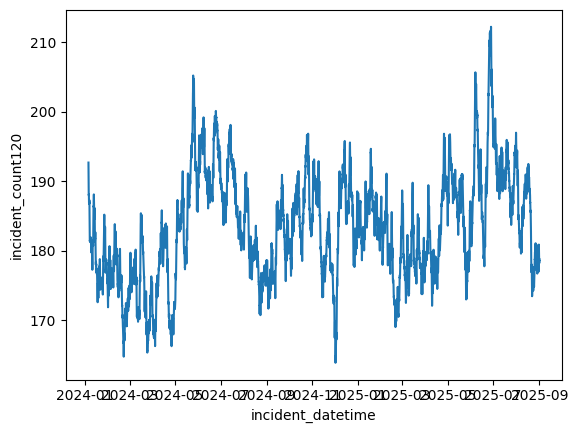

In [302]:
sns.lineplot(data=hourly_counts,x=hourly_counts.index,y='incident_count120')

In [303]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [304]:
decomposition = seasonal_decompose(hourly_counts['incident_count'], model='additive', period=24)

In [305]:
decomposition

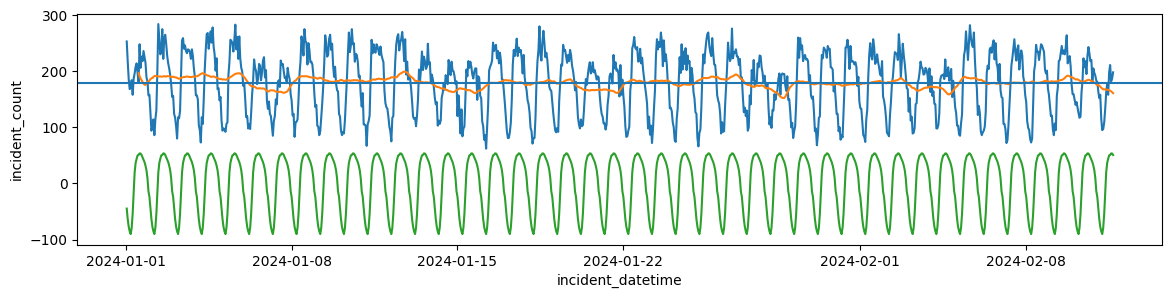

In [306]:
plt.figure(figsize=(14, 3))
sns.lineplot(x=hourly_counts.index[:1000],y=hourly_counts['incident_count'][:1000])
sns.lineplot(x=decomposition.trend.index[:1000], y=decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(hourly_counts['incident_count'][:1000].mean())


Mavi → gerçek hourly incident_count
Turuncu → trend
Yeşil → seasonal component
Düz çizgi → mean


Look at the green line.
There is a regular wave pattern that repeats every 24 hours.

Strong daily seasonality
Weak trend
Noise var
Stationary değil (seasonality yüzünden)
i need the use sarima
SEASONAL arima

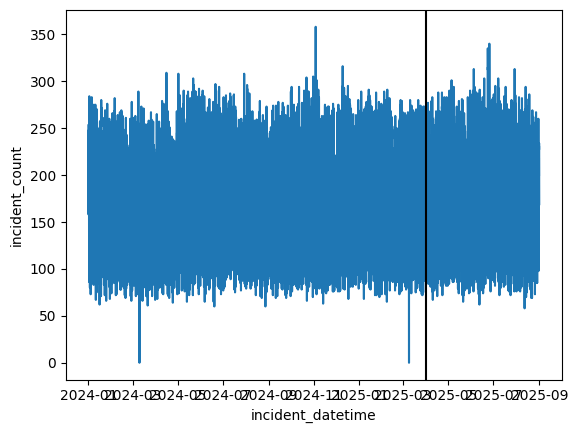

In [307]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='incident_count')
plt.axvline(pd.to_datetime("2025-04-01 12:00:00"), color='black',label='cutoff_date')

In [308]:
hourly_counts[hourly_counts == 0].sum()

incident_count       0.0
diff                 0.0
incident_count120    0.0
dtype: float64

<Axes: xlabel='incident_datetime'>

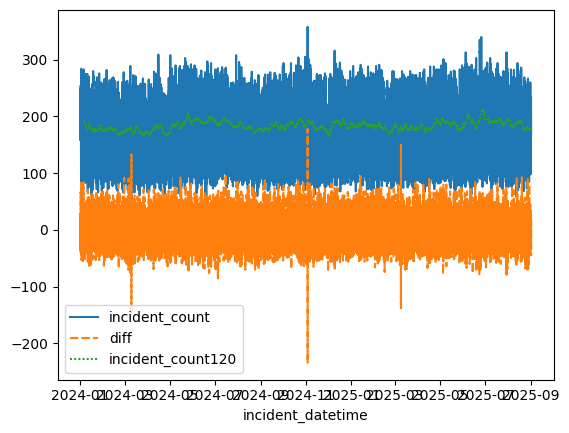

In [309]:
sns.lineplot(data=hourly_counts)

In [310]:
hourly_counts['diff'].describe()

count    14614.000000
mean        -0.005748
std         25.754501
min       -234.000000
25%        -18.000000
50%         -2.000000
75%         16.000000
max        178.000000
Name: diff, dtype: float64

In [311]:
hourly_counts['diff'].abs().sort_values(ascending=False).head(10)


incident_datetime
2024-11-03 02:00:00    234.0
2024-11-03 01:00:00    178.0
2025-03-09 03:00:00    152.0
2024-03-10 02:00:00    149.0
2025-03-09 02:00:00    138.0
2024-03-10 03:00:00    133.0
2024-07-15 09:00:00     98.0
2025-01-13 09:00:00     95.0
2024-05-15 08:00:00     94.0
2025-08-19 09:00:00     93.0
Name: diff, dtype: float64

I noticed large spikes in the differenced series on DST transition dates (March and November). These are not real anomalies but artifacts caused by clock changes. Converting the datetime index to UTC would eliminate this structural issue before forecasting.

In [312]:
hourly_counts.index.min(), hourly_counts.index.max(), hourly_counts.index.duplicated().sum()


(Timestamp('2024-01-01 01:00:00'),
 Timestamp('2025-08-31 23:00:00'),
 np.int64(0))

In [313]:
hourly_counts = hourly_counts[~hourly_counts.index.strftime("%Y-%m-%d").isin(["2024-03-10","2024-11-03","2025-03-09"])]

In [314]:
hourly_counts["diff"] = hourly_counts["incident_count"].diff()

hourly_counts["diff"].abs().sort_values(ascending=False).head(10)


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/2825268877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts["diff"] = hourly_counts["incident_count"].diff()


incident_datetime
2024-07-15 09:00:00    98.0
2025-01-13 09:00:00    95.0
2024-05-15 08:00:00    94.0
2025-08-12 13:00:00    93.0
2025-08-19 09:00:00    93.0
2025-08-27 09:00:00    92.0
2024-02-29 09:00:00    92.0
2024-03-06 08:00:00    91.0
2025-04-16 09:00:00    90.0
2024-09-06 08:00:00    90.0
Name: diff, dtype: float64

I removed the DST transition days because they artificially create large jumps in hourly data.

In [315]:
split_df = hourly_counts.copy()

In [316]:
cutoff_date = pd.to_datetime("2025-04-01 12:00:00")

training_set = split_df[split_df.index < cutoff_date]
test_set = split_df[split_df.index >= cutoff_date]


In [317]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10883 entries, 2024-01-01 01:00:00 to 2025-04-01 11:00:00
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   incident_count     10883 non-null  float64
 1   diff               10882 non-null  float64
 2   incident_count120  10764 non-null  float64
dtypes: float64(3)
memory usage: 340.1 KB


In [318]:
training_set.isna().sum()

incident_count         0
diff                   1
incident_count120    119
dtype: int64

In [319]:
training_set = training_set.drop(columns=['incident_count120'])

In [320]:
training_set = training_set.dropna()

In [321]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10882 entries, 2024-01-01 02:00:00 to 2025-04-01 11:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_count  10882 non-null  float64
 1   diff            10882 non-null  float64
dtypes: float64(2)
memory usage: 255.0 KB


In [322]:
test_set = test_set.drop(columns=['incident_count120'])

In [323]:
test_set = test_set.dropna()

In [324]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3660 entries, 2025-04-01 12:00:00 to 2025-08-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_count  3660 non-null   float64
 1   diff            3660 non-null   float64
dtypes: float64(2)
memory usage: 85.8 KB


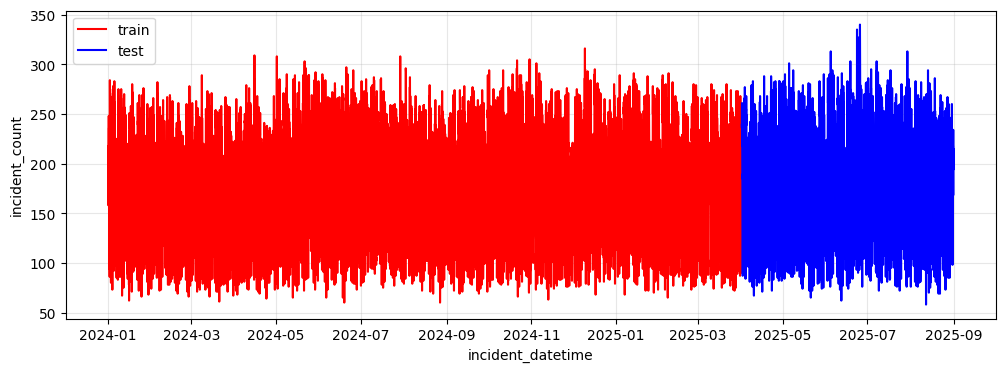

In [325]:
plt.figure(figsize=(12,4))

sns.lineplot(data=training_set, x=training_set.index, y='incident_count', label='train', color='red')
sns.lineplot(data=test_set,  x=test_set.index,  y='incident_count', label='test',  color='blue')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [326]:
training_set=training_set.drop(columns=['diff'])
test_set=test_set.drop(columns=['diff'])

ADF TEST Amaç: Zaman serisinin durağanlığını (ortalama ve varyansın zamanla değişmemesi) kontrol etmek.

In [327]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(training_set['incident_count'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -11.72483688192259
p-value: 1.385533519276388e-21


In [328]:
#stationary_

In [329]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [330]:
model = SARIMAX(training_set['incident_count'], order=(1,0,1), seasonal_order=(1,1,1,24))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


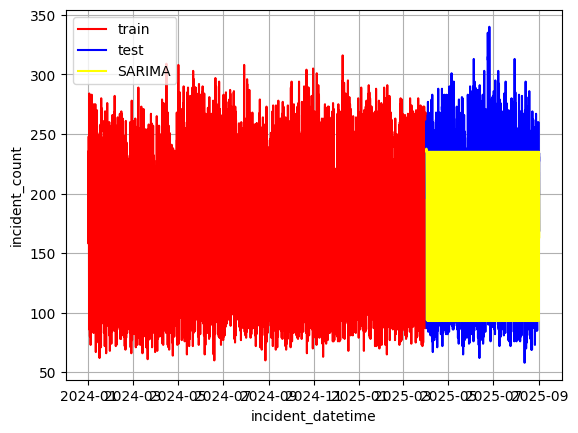

In [331]:
sarima_predictions = model_fit.get_forecast(steps=len(test_set)).predicted_mean

sns.lineplot(data=training_set, x=training_set.index, y='incident_count', label='train', color='red')
sns.lineplot(data=test_set,  x=test_set.index,  y='incident_count', label='test',  color='blue')
sns.lineplot(x=test_set.index,y=sarima_predictions,color='yellow',label='SARIMA')
plt.grid()

In [332]:
len(test_set)



3660

The forecast becomes flat in long horizons because the model uses its own predictions to generate future values. This causes error accumulation and the model slowly moves toward the average value.

In [333]:
actual_168 = test_set["incident_count"].iloc[:168]

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


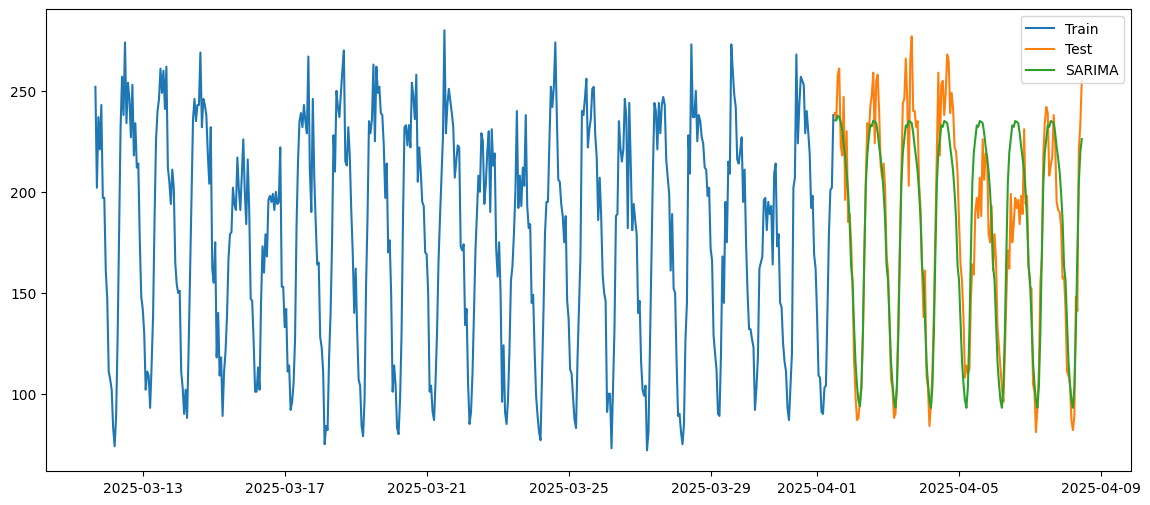

In [334]:
short_pred = model_fit.get_forecast(steps=168).predicted_mean

plt.figure(figsize=(14,6))
plt.plot(training_set.index[-500:], training_set["incident_count"][-500:], label="Train")
plt.plot(test_set.index[:168], test_set["incident_count"][:168], label="Test")
plt.plot(test_set.index[:168], short_pred, label="SARIMA")
plt.legend()
plt.show()

In [335]:
def model_evulation(actual_values,predict_values):
    print(f'root_mean_squared_error :{root_mean_squared_error(actual_values,predict_values)}')
    print(f'mean_squared_error :{mean_squared_error(actual_values,predict_values)}')
    print(f'mean_absolute_error :{mean_absolute_error(actual_values,predict_values)}')
    print(f'r2_score :{r2_score(actual_values,predict_values)}')


In [336]:
model_evulation(test_set,sarima_predictions)

root_mean_squared_error :25.54603595673547
mean_squared_error :652.5999531028215
mean_absolute_error :20.084064071703796
r2_score :0.8018706537203765


In [337]:
model_evulation(actual_168,short_pred)

root_mean_squared_error :22.044982885364913
mean_squared_error :485.9812704160319
mean_absolute_error :17.688659256766613
r2_score :0.8292568420669624


The baseline just repeats yesterday’s hourly value. I used it to check if SARIMA is really better than a simple repetition.

In [338]:
baseline_pred = test_set['incident_count'].shift(24)


In [339]:
baseline_pred.isna().sum()

np.int64(24)

In [340]:
baseline_pred = baseline_pred.dropna()

In [341]:
baseline_actual = test_set['incident_count'].iloc[24:]

In [342]:
model_evulation(baseline_actual, baseline_pred)


root_mean_squared_error :29.7975336949458
mean_squared_error :887.8930143014302
mean_absolute_error :22.844334433443343
r2_score :0.730403306295119


Ben şunu yaptım:
Çok basit bir model yaptım.
Bu model sadece dünün aynı saatini tekrar ediyor.
SARIMA bundan daha iyi mi diye baktım.
Eğer daha iyiyse → model mantıklı

The model predicts future hourly incident counts.
It helps us see what may happen next.
It is useful for short-term planning.

In [343]:
import pickle

with open("sarima_model.pkl", "wb") as u:
    pickle.dump(model_fit, u)
    

In [344]:
print (main_df.columns)

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'valid_dispatch_rspns_time_indc',
       'valid_incident_rspns_time_indc', 'held_indicator',
       'incident_disposition_code', 'borough', 'incident_dispatch_area',
       'zipcode', 'policeprecinct', 'citycouncildistrict', 'communitydistrict',
       'communityschooldistrict', 'congressionaldistrict', 'reopen_indicator',
       'special_event_indicator', 'standby_indicator', 'transfer_indicator',
       'incident_response_seconds_qy'],
      dtype='object')


In [345]:
try_df = main_df.copy()

In [346]:
forecast = model_fit.forecast(steps=24)

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [347]:
try_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   cad_incident_id                 int64         
 1   incident_datetime               datetime64[ns]
 2   initial_call_type               object        
 3   initial_severity_level_code     int64         
 4   valid_dispatch_rspns_time_indc  object        
 5   valid_incident_rspns_time_indc  object        
 6   held_indicator                  object        
 7   incident_disposition_code       object        
 8   borough                         object        
 9   incident_dispatch_area          object        
 10  zipcode                         float64       
 11  policeprecinct                  float64       
 12  citycouncildistrict             float64       
 13  communitydistrict               float64       
 14  communityschooldistrict         float64       
 15

In [348]:
forecast_df = forecast.rename("predicted_calls").to_frame().reset_index()
print(forecast_df.columns)


Index(['index', 'predicted_calls'], dtype='object')


In [349]:
# forecast değerleri
pred = forecast.values

# son gerçek saat
last_dt = try_df["incident_datetime"].max()

# gelecekteki 24 saat
future_dates = pd.date_range(
    start=last_dt + pd.Timedelta(hours=1),
    periods=len(pred),
    freq="h"
)

# future dataframe
future_df = pd.DataFrame({
    "datetime_hour": future_dates,
    "hour": future_dates.hour,
    "calls_last_1h": pred
})


In [350]:
##LINEAR MODEL LEARNING STARTS HERELINEAR MODEL LEARNING STARTS HERE

In [351]:
import pandas as pd
linear_model_df = pd.read_csv("../data/raw/ems_2025_merged.csv")

In [352]:
linear_model_df

,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,on_scene_time,valid_incident_response,travel_time_sec,close_time,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,to_hospital_time,hospital_arrival_time,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,2025-01-01T09:53:56.000,N,15.0,2025-01-01T14:03:04.000,N,91,BROOKLYN,CW,11224,60,47,313,21,8,Y,N,Y,N,NaN,NaN,NaN,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.5771,-73.9881,Engine 318/Ladder 166,0.300912
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,2025-01-01T00:09:27.000,Y,441.0,2025-01-01T01:32:53.000,N,82,MANHATTAN,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025-01-01T00:21:01.000,2025-01-01T00:39:03.000,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7506,-73.9971,Engine 34/Ladder 21,0.446225
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,2025-01-01T00:01:58.000,Y,0.0,2025-01-01T00:10:49.000,N,93,MANHATTAN,M3,10036,14,3,104,2,10,N,N,N,N,0.0,NaN,NaN,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7590,-73.9899,Battalion 9/Engine 54/Ladder 4,0.280244
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,2025-01-01T00:14:36.000,Y,637.0,2025-01-01T01:22:42.000,N,82,MANHATTAN,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025-01-01T00:28:30.000,2025-01-01T00:37:31.000,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8583,-73.9301,Engine 95/Ladder 36,0.712385
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,2025-01-01T00:09:20.000,Y,254.0,2025-01-01T01:36:32.000,N,82,BRONX,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025-01-01T00:40:27.000,2025-01-01T00:50:50.000,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079486,252435374,2025-08-31 23:58:45,UNKNOW,4,UNKNOW,4,2025-09-01T00:41:26.000,Y,2561,2025-09-01T00:42:18.000,NaN,N,NaN,2025-09-01T00:47:54.000,N,CANCEL,BRONX,B1,10459,41,17,202,8,15,N,N,N,N,NaN,NaN,NaN,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,40.8263,-73.8926,Engine 82/Ladder 31,0.292276
1079487,252435375,2025-08-31 23:58:59,OTHER,6,OTHER,6,2025-08-31T23:59:08.000,Y,9,2025-08-31T23:59:21.000,2025-09-01T00:03:42.000,Y,274.0,2025-09-01T00:18:17.000,N,91,QUEENS,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,NaN,NaN,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,40.6013,-73.7565,Engine 264/Engine 328/Ladder 134,0.470051
1079488,252435378,2025-08-31 23:59:22,INJURY,5,INJURY,5,2025-08-31T23:59:37.000,Y,15,2025-08-31T23:59:57.000,NaN,N,NaN,2025-09-01T00:50:02.000,N,93,BROOKLYN,K4,11210,63,45,318,22,8,N,N,N,N,NaN,NaN,NaN,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,40.6277,-73.9466,Engine 255/Ladder 157,0.813416
1079489,252435381,2025-08-31 23:59:52,MVAINJ,5,MVAINJ,5,2025-08-31T23:59:52.000,Y,0,2025-08-31T2

In [353]:
linear_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 51 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   incident_id                      1079491 non-null  int64  
 1   datetime                         1079491 non-null  object 
 2   initial_type                     1079491 non-null  object 
 3   initial_severity                 1079491 non-null  int64  
 4   final_type                       1079491 non-null  object 
 5   final_severity                   1079491 non-null  int64  
 6   assignment_time                  1056283 non-null  object 
 7   valid_dispatch_response          1079491 non-null  object 
 8   dispatch_response_sec            1079491 non-null  int64  
 9   activation_time                  1054306 non-null  object 
 10  on_scene_time                    1014350 non-null  object 
 11  valid_incident_response          1079491 non-null 

In [354]:
linear_model_df.isna().sum()

incident_id                             0
datetime                                0
initial_type                            0
initial_severity                        0
final_type                              0
final_severity                          0
assignment_time                     23208
valid_dispatch_response                 0
dispatch_response_sec                   0
activation_time                     25185
on_scene_time                       65141
valid_incident_response                 0
travel_time_sec                     65141
close_time                            125
held                                    0
disposition                             0
borough                                 0
dispatch_area                           0
zipcode                                 0
precinct                                0
council_district                        0
community_district                      0
school_district                         0
congressional_district            

In [355]:
linear_model_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'final_type', 'final_severity', 'assignment_time',
       'valid_dispatch_response', 'dispatch_response_sec', 'activation_time',
       'on_scene_time', 'valid_incident_response', 'travel_time_sec',
       'close_time', 'held', 'disposition', 'borough', 'dispatch_area',
       'zipcode', 'precinct', 'council_district', 'community_district',
       'school_district', 'congressional_district', 'reopened',
       'special_events', 'standby', 'transferred', 'incident_response_sec',
       'to_hospital_time', 'hospital_arrival_time', 'year', 'month', 'day',
       'week_day', 'hour', 'is_weekend', 'is_rush_hour', 'time_of_day',
       'season', 'is_holiday', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode',
       'latitude_of_call', 'longitude_of_call', 'closest_station_name',
       'closest_station_manhattan_miles'],
      dtype='object')

In [356]:
main_drop_cols = ['travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type'] 

In [357]:
linear_model_df = linear_model_df.drop(columns=main_drop_cols)

In [358]:
linear_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 41 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   incident_id                      1079491 non-null  int64  
 1   datetime                         1079491 non-null  object 
 2   initial_type                     1079491 non-null  object 
 3   initial_severity                 1079491 non-null  int64  
 4   valid_dispatch_response          1079491 non-null  object 
 5   valid_incident_response          1079491 non-null  object 
 6   held                             1079491 non-null  object 
 7   disposition                      1079491 non-null  object 
 8   borough                          1079491 non-null  object 
 9   dispatch_area                    1079491 non-null  object 
 10  zipcode                          1079491 non-null  int64  
 11  precinct                         1079491 non-null 

In [359]:
linear_model_df.isna().sum()

incident_id                            0
datetime                               0
initial_type                           0
initial_severity                       0
valid_dispatch_response                0
valid_incident_response                0
held                                   0
disposition                            0
borough                                0
dispatch_area                          0
zipcode                                0
precinct                               0
council_district                       0
community_district                     0
school_district                        0
congressional_district                 0
reopened                               0
special_events                         0
standby                                0
transferred                            0
incident_response_sec              65396
year                                   0
month                                  0
day                                    0
week_day        

In [360]:
linear_model_df = linear_model_df.dropna(subset=["incident_response_sec"])


In [361]:
linear_model_df.isna().sum()

incident_id                            0
datetime                               0
initial_type                           0
initial_severity                       0
valid_dispatch_response                0
valid_incident_response                0
held                                   0
disposition                            0
borough                                0
dispatch_area                          0
zipcode                                0
precinct                               0
council_district                       0
community_district                     0
school_district                        0
congressional_district                 0
reopened                               0
special_events                         0
standby                                0
transferred                            0
incident_response_sec                  0
year                                   0
month                                  0
day                                    0
week_day        

In [362]:
linear_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014095 entries, 1 to 1079490
Data columns (total 41 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   incident_id                      1014095 non-null  int64  
 1   datetime                         1014095 non-null  object 
 2   initial_type                     1014095 non-null  object 
 3   initial_severity                 1014095 non-null  int64  
 4   valid_dispatch_response          1014095 non-null  object 
 5   valid_incident_response          1014095 non-null  object 
 6   held                             1014095 non-null  object 
 7   disposition                      1014095 non-null  object 
 8   borough                          1014095 non-null  object 
 9   dispatch_area                    1014095 non-null  object 
 10  zipcode                          1014095 non-null  int64  
 11  precinct                         1014095 non-null  int6

In [363]:
linear_model_df = linear_model_df.drop(columns=["latitude_of_call","longitude_of_call"])


In [364]:
linear_model_df["closest_station_manhattan_miles"] = linear_model_df["closest_station_manhattan_miles"].fillna(linear_model_df["closest_station_manhattan_miles"].median())


In [365]:
linear_model_df.shape

(1014095, 39)

In [366]:
linear_model_df['datetime'].min(), linear_model_df['datetime'].max()

('2025-01-01 00:01:53', '2025-08-31 23:59:55')

In [367]:
linear_model_df['day']

1           1
2           1
3           1
4           1
5           1
           ..
1079484    31
1079485    31
1079487    31
1079489    31
1079490    31
Name: day, Length: 1014095, dtype: int64

In [368]:
linear_model_df['datetime'].dtype

dtype('O')

In [369]:
linear_model_df['datetime_hour'] = pd.to_datetime(linear_model_df['datetime_hour'], format='mixed')

In [370]:
linear_model_df

,incident_id,datetime,initial_type,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_name,closest_station_manhattan_miles
1,250010003,2025-01-01 00:01:53,UNC,2,Y,Y,N,82,MANHATTAN,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Engine 34/Ladder 21,0.446225
2,250010004,2025-01-01 00:01:58,CARD,3,Y,Y,N,93,MANHATTAN,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Battalion 9/Engine 54/Ladder 4,0.280244
3,250010007,2025-01-01 00:03:42,ABDPN,5,Y,Y,N,82,MANHATTAN,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Engine 95/Ladder 36,0.712385
4,250010008,2025-01-01 00:04:36,STATEP,2,Y,Y,N,82,BRONX,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Battalion 15/Engine 63/Ladder 39,0.668752
5,250010009,2025-01-01 00:05:26,DIFFBR,2,Y,Y,N,82,RICHMOND / STATEN ISLAND,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Staten Island Borough Command/Squad 8,0.870994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,ABDPN,5,Y,Y,N,82,QUEENS,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 273/Ladder 129,0.669801
1079485,252435373,2025-08-31 23:58:20,UNKNOW,4,Y,Y,N,87,QUEENS,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Battalion 46/Engine 287/Ladder 136,0.169950
1079487,252435375,2025-08-31 23:58:59,OTHER,6,Y,Y,N,91,QUEENS,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 264/Engine 328/Ladder 134,0.470051
1079489,252435381,2025-08-31 23:59:52,MVAINJ,5,Y,Y,N,93,BROOKLYN,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 221/Ladder 104,0.454651


In [371]:
linear_model_df['initial_type'].value_counts()

initial_type
INJURY    120346
SICK      108691
UNKNOW    100287
CARDBR     72161
UNC        68187
           ...  
ADM            1
CDBRFC         1
T-OBST         1
ALTMFC         1
MOSINJ         1
Name: count, Length: 107, dtype: int64

In [372]:
top_10 = linear_model_df["initial_type"] .value_counts() .nlargest(10) .index

In [373]:
linear_model_df["initial_type"] = linear_model_df["initial_type"].apply(lambda x: x if x in top_10 else "OTHER")


In [374]:
initial_dummies = pd.get_dummies(linear_model_df["initial_type"],drop_first=True,dtype="int8")
linear_model_df = pd.concat([linear_model_df.drop(columns=["initial_type"]),initial_dummies],axis=1)

In [375]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_name,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW
1,250010003,2025-01-01 00:01:53,2,Y,Y,N,82,MANHATTAN,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Engine 34/Ladder 21,0.446225,0,0,0,0,0,0,0,0,1,0
2,250010004,2025-01-01 00:01:58,3,Y,Y,N,93,MANHATTAN,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Battalion 9/Engine 54/Ladder 4,0.280244,1,0,0,0,0,0,0,0,0,0
3,250010007,2025-01-01 00:03:42,5,Y,Y,N,82,MANHATTAN,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Engine 95/Ladder 36,0.712385,0,0,0,0,0,0,0,0,0,0
4,250010008,2025-01-01 00:04:36,2,Y,Y,N,82,BRONX,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Battalion 15/Engine 63/Ladder 39,0.668752,0,0,0,0,0,0,1,0,0,0
5,250010009,2025-01-01 00:05:26,2,Y,Y,N,82,RICHMOND / STATEN ISLAND,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,Staten Island Borough Command/Squad 8,0.870994,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,Y,Y,N,82,QUEENS,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 273/Ladder 129,0.669801,0,0,0,0,0,0,0,0,0,0
1079485,252435373,2025-08-31 23:58:20,4,Y,Y,N,87,QUEENS,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Battalion 46/Engine 287/Ladder 136,0.169950,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,Y,Y,N,91,QUEENS,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 264/Engine 328/Ladder 134,0.470051,0,0,0,0,0,0,1,0,0,0
1079489,252435381,2025-08-31 23:59:52,5,Y,Y,N,93,BROOKLYN,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,Engine 221/Ladder 104,0.454651,0,0,0,0,0,0,1,0,0,0


In [376]:
linear_model_df=linear_model_df.drop(columns=['closest_station_name'])

In [377]:
linear_model_df['borough'].value_counts()

borough
BROOKLYN                    285754
BRONX                       237000
MANHATTAN                   236493
QUEENS                      209994
RICHMOND / STATEN ISLAND     44853
UNKNOWN                          1
Name: count, dtype: int64

In [378]:
linear_model_df=linear_model_df[linear_model_df['borough']!="UNKNOWN"]

In [379]:
linear_model_df['borough'].value_counts()

borough
BROOKLYN                    285754
BRONX                       237000
MANHATTAN                   236493
QUEENS                      209994
RICHMOND / STATEN ISLAND     44853
Name: count, dtype: int64

In [380]:
nyc_boroughs_dict = {'MANHATTAN': 0, 'BROOKLYN': 1, 'QUEENS': 2, 'BRONX': 3, 'RICHMOND / STATEN ISLAND': 4}

In [381]:
linear_model_df['borough']=linear_model_df['borough'].map(nyc_boroughs_dict)

In [382]:
linear_model_df['borough'].value_counts()

borough
1    285754
3    237000
0    236493
2    209994
4     44853
Name: count, dtype: int64

In [383]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW
1,250010003,2025-01-01 00:01:53,2,Y,Y,N,82,0,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0
2,250010004,2025-01-01 00:01:58,3,Y,Y,N,93,0,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0
3,250010007,2025-01-01 00:03:42,5,Y,Y,N,82,0,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0
4,250010008,2025-01-01 00:04:36,2,Y,Y,N,82,3,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0
5,250010009,2025-01-01 00:05:26,2,Y,Y,N,82,4,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,Y,Y,N,82,2,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0
1079485,252435373,2025-08-31 23:58:20,4,Y,Y,N,87,2,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,Y,Y,N,91,2,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0
1079489,252435381,2025-08-31 23:59:52,5,Y,Y,N,93,1,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0


In [384]:
linear_model_df['valid_dispatch_response'].value_counts()

valid_dispatch_response
Y    1014094
Name: count, dtype: int64

In [385]:
linear_model_df['valid_dispatch_response']=linear_model_df['valid_dispatch_response'].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/1318834491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df['valid_dispatch_response']=linear_model_df['valid_dispatch_response'].replace({'Y': 0, 'N': 1})


In [386]:
linear_model_df['valid_dispatch_response'].value_counts()

valid_dispatch_response
0    1014094
Name: count, dtype: int64

In [387]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW
1,250010003,2025-01-01 00:01:53,2,0,Y,N,82,0,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0
2,250010004,2025-01-01 00:01:58,3,0,Y,N,93,0,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,Y,N,82,0,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0
4,250010008,2025-01-01 00:04:36,2,0,Y,N,82,3,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0
5,250010009,2025-01-01 00:05:26,2,0,Y,N,82,4,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,Y,N,82,2,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,Y,N,87,2,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,Y,N,91,2,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,Y,N,93,1,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0


In [388]:
linear_model_df['valid_incident_response'].value_counts()

valid_incident_response
Y    1014094
Name: count, dtype: int64

In [389]:
linear_model_df['valid_incident_response']=linear_model_df['valid_incident_response'].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/216116859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df['valid_incident_response']=linear_model_df['valid_incident_response'].replace({'Y': 0, 'N': 1})


In [390]:
linear_model_df['valid_incident_response'].value_counts()

valid_incident_response
0    1014094
Name: count, dtype: int64

In [391]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW
1,250010003,2025-01-01 00:01:53,2,0,0,N,82,0,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0
2,250010004,2025-01-01 00:01:58,3,0,0,N,93,0,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,N,82,0,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,N,82,3,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,N,82,4,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,N,82,2,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,N,87,2,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,N,91,2,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,N,93,1,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0


In [392]:
linear_model_df['held'].value_counts()

held
N    830385
Y    183709
Name: count, dtype: int64

In [393]:
linear_model_df['held']=linear_model_df['held'].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/3948345080.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df['held']=linear_model_df['held'].replace({'Y': 0, 'N': 1})


In [394]:
linear_model_df['held'].value_counts()

held
1    830385
0    183709
Name: count, dtype: int64

In [395]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,M2,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,M3,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,M9,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,B4,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,S1,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,Q7,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,Q6,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,Q1,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,K7,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0


In [396]:
linear_model_df['dispatch_area'].value_counts()

dispatch_area
K4    71618
B2    69834
Q6    59055
B1    58366
Q2    53534
B3    45183
K1    43355
M3    42403
M2    41454
K7    40017
K6    38821
K2    36747
B5    33911
M1    31862
K3    31652
B4    29598
M7    29309
M9    26647
M5    25056
Q3    24809
Q7    24162
K5    23829
S1    22037
Q4    19214
M4    18390
S2    16922
Q1    16635
M8    13488
Q5    12366
M6     7756
S3     5878
CW      153
X1       33
Name: count, dtype: int64

In [397]:
top10=linear_model_df['dispatch_area'].value_counts().nlargest(10).index
linear_model_df['dispatch_area'] = linear_model_df['dispatch_area'].apply(lambda x: x if x in top10 else "OTHER")

In [398]:
dispatch_dummies = pd.get_dummies(linear_model_df["dispatch_area"],drop_first=True,dtype="int8")

In [399]:
linear_model_df = pd.concat([linear_model_df.drop(columns=["dispatch_area"]), dispatch_dummies],axis=1)


In [400]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,N,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,N,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,N,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,N,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,N,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,N,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,N,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,N,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,N,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [401]:
linear_model_df['reopened'].value_counts()

reopened
N    999154
Y     14940
Name: count, dtype: int64

In [402]:
linear_model_df['reopened']=linear_model_df['reopened'].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/4241701595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df['reopened']=linear_model_df['reopened'].replace({'Y': 0, 'N': 1})


In [403]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,N,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,N,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,N,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,N,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,N,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,N,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,N,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,N,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,N,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [404]:
linear_model_df['special_events'].value_counts()

special_events
N    1014073
Y         21
Name: count, dtype: int64

In [405]:
linear_model_df['special_events']=linear_model_df['special_events'].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/1437388523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df['special_events']=linear_model_df['special_events'].replace({'Y': 0, 'N': 1})


In [406]:
linear_model_df['special_events'].value_counts()

special_events
1    1014073
0         21
Name: count, dtype: int64

In [407]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,N,N,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,N,N,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,N,N,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,N,N,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,N,N,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,N,N,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,N,N,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,N,N,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,N,N,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [408]:
linear_model_df['standby'].value_counts()

standby
N    1012020
Y       2074
Name: count, dtype: int64

In [409]:
linear_model_df[['standby', 'transferred']].value_counts()  

standby  transferred
N        N              1012018
Y        N                 2074
N        Y                    2
Name: count, dtype: int64

In [410]:
linear_model_df[['standby', 'transferred']]=linear_model_df[['standby', 'transferred']].replace({'Y': 0, 'N': 1})

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/3497174911.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linear_model_df[['standby', 'transferred']]=linear_model_df[['standby', 'transferred']].replace({'Y': 0, 'N': 1})


In [411]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,Wednesday,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,1,1,0.0,2025,8,31,Sunday,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [412]:
linear_model_df['week_day'].value_counts()

week_day
Friday       150209
Thursday     147245
Wednesday    146783
Monday       145044
Tuesday      144101
Saturday     142744
Sunday       137968
Name: count, dtype: int64

In [413]:
weekday_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

In [414]:
linear_model_df['week_day']=linear_model_df['week_day'].map(weekday_dict)  

In [415]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,2,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,night,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,6,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,1,1,0.0,2025,8,31,6,23,1,0,night,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [416]:
linear_model_df['time_of_day'].value_counts()

time_of_day
afternoon    319767
night        250122
morning      243509
evening      200696
Name: count, dtype: int64

In [417]:
time_of_day_dict = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}

In [418]:
linear_model_df['time_of_day']=linear_model_df['time_of_day'].map(time_of_day_dict)

In [419]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,1,1,0.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [420]:
(linear_model_df['datetime_hour'] == linear_model_df['datetime_weather']).all()


np.True_

In [421]:
linear_model_df=linear_model_df.drop(columns=['datetime_weather'])

In [422]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,winter,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,1,1,0.0,2025,8,31,6,23,1,0,3,summer,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [423]:
linear_model_df['season'].value_counts()

season
summer    389855
spring    381577
winter    242662
Name: count, dtype: int64

In [424]:
season_dict = {'spring': 0, 'summer': 1,'winter': 2}

In [425]:
linear_model_df['season']=linear_model_df['season'].map(season_dict)

In [426]:
linear_model_df

,incident_id,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
1,250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079484,252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1079485,252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1079487,252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1079489,252435381,2025-08-31 23:59:52,5,0,0,1,93,1,11211,90,34,301,14,7,1,1,1,1,0.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.454651,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


<Axes: xlabel='None', ylabel='incident_response_sec'>

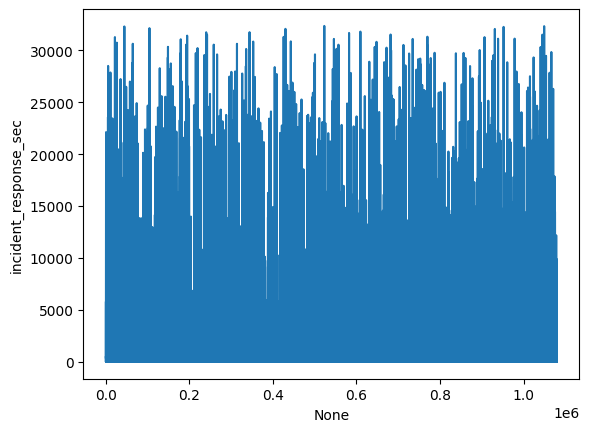

In [427]:
sns.lineplot(data=linear_model_df, x=linear_model_df.index, y='incident_response_sec')

In [428]:
linear_model_df=linear_model_df.set_index("incident_id")

In [429]:
linear_model_df

,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
incident_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
250010004,2025-01-01 00:01:58,3,0,0,1,93,0,10036,14,3,104,2,10,1,1,1,1,0.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.280244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
252435375,2025-08-31 23:58:59,6,0,0,1,91,2,11691,101,31,414,27,5,1,1,1,1,283.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.470051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='incident_id', ylabel='incident_response_sec'>

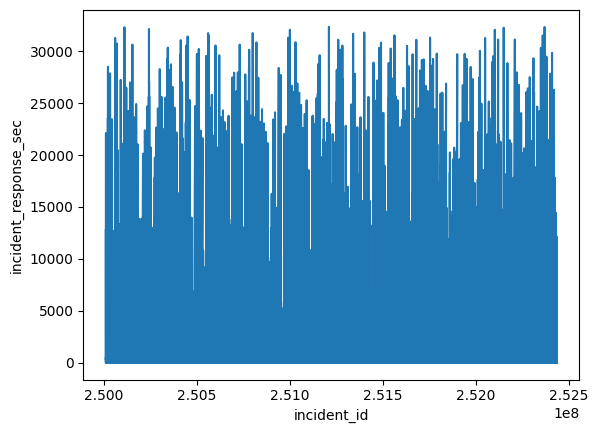

In [430]:
sns.lineplot(data=linear_model_df, x=linear_model_df.index, y='incident_response_sec')


<Axes: xlabel='incident_response_sec', ylabel='Count'>

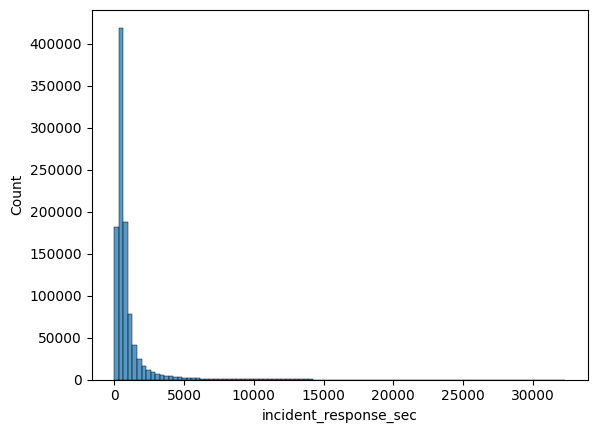

In [431]:
sns.histplot(linear_model_df['incident_response_sec'], bins=100)


In [432]:
(linear_model_df['incident_response_sec'] == 0).sum()

np.int64(9699)

In [433]:
linear_model_df=linear_model_df[linear_model_df['incident_response_sec'] > 0]

In [434]:
linear_model_df=linear_model_df[linear_model_df['incident_response_sec']<5000]

In [435]:
linear_model_df

,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,precipitation,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6
incident_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
250010010,2025-01-01 00:05:48,2,0,0,1,82,0,10025,24,7,107,3,10,1,1,1,1,323.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,0.0,10.7,3,0.210691,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252435371,2025-08-31 23:58:05,6,0,0,0,82,2,11101,108,26,402,30,12,1,1,1,1,1913.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.658906,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,0.0,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [436]:
linear_model_df.skew(numeric_only=True).sort_values(ascending=False)


precipitation                       12.720187
INJMAJ                               4.847068
K7                                   4.702231
M2                                   4.645439
M3                                   4.597490
K1                                   4.483150
B3                                   4.448007
DIFFBR                               4.403138
DRUG                                 4.076991
Q2                                   3.962847
CARD                                 3.890310
Q6                                   3.749987
B2                                   3.449303
UNC                                  3.410293
K4                                   3.334162
CARDBR                               3.279613
incident_response_sec                2.763345
UNKNOW                               2.675832
SICK                                 2.598168
INJURY                               2.368629
weathercode                          2.061601
closest_station_manhattan_miles   

In [437]:
linear_model_df['precipitation'].value_counts()

precipitation
0.0    842054
0.1     46258
0.2     18558
0.3     13058
0.4      8546
        ...  
5.1       105
6.2       101
6.0        87
7.3        86
7.9        79
Name: count, Length: 65, dtype: int64

In [438]:
linear_model_df['is_raining'] = (linear_model_df['precipitation'] > 0).astype(int)
linear_model_df['log_precip'] = np.log1p(linear_model_df['precipitation'])


In [439]:
linear_model_df=linear_model_df.drop(columns=['precipitation'])

In [440]:
linear_model_df

,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,year,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6,is_raining,log_precip
incident_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0
250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010010,2025-01-01 00:05:48,2,0,0,1,82,0,10025,24,7,107,3,10,1,1,1,1,323.0,2025,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.210691,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252435371,2025-08-31 23:58:05,6,0,0,0,82,2,11101,108,26,402,30,12,1,1,1,1,1913.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.658906,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,2025,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0


In [441]:
linear_model_df['year'].value_counts()

year
2025    986655
Name: count, dtype: int64

In [442]:
linear_model_df=linear_model_df.drop(columns=['year'])

In [443]:
linear_model_df

,datetime,initial_severity,valid_dispatch_response,valid_incident_response,held,disposition,borough,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,incident_response_sec,month,day,week_day,hour,is_weekend,is_rush_hour,time_of_day,season,is_holiday,datetime_hour,temperture,windspeed,weathercode,closest_station_manhattan_miles,CARD,CARDBR,DIFFBR,DRUG,INJMAJ,INJURY,OTHER,SICK,UNC,UNKNOW,B2,B3,K1,K4,K7,M2,M3,OTHER,Q2,Q6,is_raining,log_precip
incident_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250010003,2025-01-01 00:01:53,2,0,0,1,82,0,10001,10,3,104,2,10,1,1,1,1,454.0,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.446225,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0
250010007,2025-01-01 00:03:42,5,0,0,1,82,0,10040,34,10,112,6,13,1,1,1,1,654.0,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.712385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010008,2025-01-01 00:04:36,2,0,0,1,82,3,10466,47,12,212,11,16,1,1,1,1,284.0,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.668752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010009,2025-01-01 00:05:26,2,0,0,1,82,4,10314,120,50,501,31,11,1,1,1,1,366.0,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.870994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
250010010,2025-01-01 00:05:48,2,0,0,1,82,0,10025,24,7,107,3,10,1,1,1,1,323.0,1,1,2,0,0,0,3,2,0,2025-01-01 00:00:00,46.8,10.7,3,0.210691,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252435371,2025-08-31 23:58:05,6,0,0,0,82,2,11101,108,26,402,30,12,1,1,1,1,1913.0,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.658906,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
252435372,2025-08-31 23:58:14,5,0,0,1,82,2,11355,109,20,407,25,6,1,1,1,1,704.0,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.669801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
252435373,2025-08-31 23:58:20,4,0,0,1,87,2,11373,110,25,404,24,14,1,1,1,1,146.0,8,31,6,23,1,0,3,1,0,2025-08-31 23:00:00,73.8,9.2,3,0.169950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0


In [444]:
linear_model_df['disposition'].value_counts()

disposition
82        629623
93        186916
90         85435
96         38525
91         26693
87          9350
83          8185
94          1660
CANCEL       133
95           110
ZZZZZZ        16
92             7
NOTSNT         2
Name: count, dtype: int64

In [445]:
top_disp = linear_model_df["disposition"].value_counts().nlargest(6).index

linear_model_df["disposition"] = linear_model_df["disposition"].apply(
    lambda x: x if x in top_disp else "OTHER"
)


In [446]:
linear_model_df = pd.get_dummies(linear_model_df,columns=["disposition"],drop_first=True)


In [447]:
linear_model_df["temp_wind"] = linear_model_df["temperture"] * linear_model_df["windspeed"]
linear_model_df["rain_distance"] = linear_model_df["is_raining"] * linear_model_df["closest_station_manhattan_miles"]
linear_model_df["rush_rain"] = linear_model_df["is_rush_hour"] * linear_model_df["is_raining"]
linear_model_df["severity_distance"] = linear_model_df["initial_severity"] * linear_model_df["closest_station_manhattan_miles"]


In [448]:
linear_model_df.columns

Index(['datetime', 'initial_severity', 'valid_dispatch_response',
       'valid_incident_response', 'held', 'borough', 'zipcode', 'precinct',
       'council_district', 'community_district', 'school_district',
       'congressional_district', 'reopened', 'special_events', 'standby',
       'transferred', 'incident_response_sec', 'month', 'day', 'week_day',
       'hour', 'is_weekend', 'is_rush_hour', 'time_of_day', 'season',
       'is_holiday', 'datetime_hour', 'temperture', 'windspeed', 'weathercode',
       'closest_station_manhattan_miles', 'CARD', 'CARDBR', 'DIFFBR', 'DRUG',
       'INJMAJ', 'INJURY', 'OTHER', 'SICK', 'UNC', 'UNKNOW', 'B2', 'B3', 'K1',
       'K4', 'K7', 'M2', 'M3', 'OTHER', 'Q2', 'Q6', 'is_raining', 'log_precip',
       'disposition_87', 'disposition_90', 'disposition_91', 'disposition_93',
       'disposition_96', 'disposition_OTHER', 'temp_wind', 'rain_distance',
       'rush_rain', 'severity_distance'],
      dtype='object')

In [449]:
[['disposition','precinct','council_district','community_district','school_district','congressional_district','windspeed','temperture']]

[['disposition',
  'precinct',
  'council_district',
  'community_district',
  'school_district',
  'congressional_district',
  'windspeed',
  'temperture']]

In [450]:
linear_model_df['log_incident_response_sec']=np.log1p(linear_model_df['incident_response_sec'])

In [451]:
linear_model_df=linear_model_df.drop(columns=['incident_response_sec'])

In [452]:
linear_model_df=linear_model_df.drop(columns=['datetime_hour'])

In [453]:
train = linear_model_df[linear_model_df["datetime"] < "2025-07-01"]
test  = linear_model_df[linear_model_df["datetime"] >= "2025-07-01"]


In [454]:
x_train = train.drop(columns=["log_incident_response_sec",'zipcode',"datetime"])
y_train = train["log_incident_response_sec"]

In [455]:
x_test = test.drop(columns=["log_incident_response_sec",'zipcode',"datetime"])
y_test = test["log_incident_response_sec"]

In [456]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734602 entries, 250010003 to 251816094
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   initial_severity                 734602 non-null  int64  
 1   valid_dispatch_response          734602 non-null  int64  
 2   valid_incident_response          734602 non-null  int64  
 3   held                             734602 non-null  int64  
 4   borough                          734602 non-null  int64  
 5   precinct                         734602 non-null  int64  
 6   council_district                 734602 non-null  int64  
 7   community_district               734602 non-null  int64  
 8   school_district                  734602 non-null  int64  
 9   congressional_district           734602 non-null  int64  
 10  reopened                         734602 non-null  int64  
 11  special_events                   734602 non-null  int64  
 

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
x_train.dtypes[x_train.dtypes == 'object']


Series([], dtype: object)

In [459]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [460]:
from sklearn.linear_model import LinearRegression

In [461]:
linreq_model = LinearRegression()
model_fit1 = linreq_model.fit(x_train_scaled, y_train)

In [462]:
train_predictions = model_fit1.predict(x_train_scaled)
test_predictions = model_fit1.predict(x_test_scaled)

In [463]:
model_evulation(y_train, train_predictions)

root_mean_squared_error :0.5781343508486477
mean_squared_error :0.3342393276311873
mean_absolute_error :0.4331574656304216
r2_score :0.3545485518440846


In [464]:
model_evulation(y_test, test_predictions)

root_mean_squared_error :0.588187772593935
mean_squared_error :0.3459648558290145
mean_absolute_error :0.4408893133315975
r2_score :0.3654398561015698


In [465]:
from sklearn.linear_model import Ridge,Lasso


In [466]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

alphas = [0.01, 0.1, 1, 5, 10, 50, 100, 200, 500]

best_score = -999
best_model = ""
best_alpha = None

for a in alphas:
    
    # Ridge
    ridge = Ridge(alpha=a)
    ridge.fit(x_train_scaled, y_train)
    r2 = r2_score(y_test, ridge.predict(x_test_scaled))
    print("Ridge alpha:", a, "R2:", r2)

    if r2 > best_score:
        best_score = r2
        best_model = "Ridge"
        best_alpha = a

    # Lasso
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(x_train_scaled, y_train)
    r2 = r2_score(y_test, lasso.predict(x_test_scaled))
    print("Lasso alpha:", a, "R2:", r2)

    if r2 > best_score:
        best_score = r2
        best_model = "Lasso"
        best_alpha = a

print("BEST MODEL:", best_model)
print("BEST ALPHA:", best_alpha)
print("BEST R2:", best_score)


Ridge alpha: 0.01 R2: 0.365439856218046
Lasso alpha: 0.01 R2: 0.3567584284834332
Ridge alpha: 0.1 R2: 0.36543985726678085
Lasso alpha: 0.1 R2: 0.3101147483937867
Ridge alpha: 1 R2: 0.3654398677372658
Lasso alpha: 1 R2: -0.0027539996008145717
Ridge alpha: 5 R2: 0.36543991390210584
Lasso alpha: 5 R2: -0.0027539996008145717
Ridge alpha: 10 R2: 0.3654399707586057
Lasso alpha: 10 R2: -0.0027539996008145717
Ridge alpha: 50 R2: 0.36544039190944233
Lasso alpha: 50 R2: -0.0027539996008145717
Ridge alpha: 100 R2: 0.365440835436909
Lasso alpha: 100 R2: -0.0027539996008145717
Ridge alpha: 200 R2: 0.3654414548185875
Lasso alpha: 200 R2: -0.0027539996008145717
Ridge alpha: 500 R2: 0.36544132527161965
Lasso alpha: 500 R2: -0.0027539996008145717
BEST MODEL: Ridge
BEST ALPHA: 200
BEST R2: 0.3654414548185875


In [467]:
from sklearn.ensemble import RandomForestRegressor

In [468]:
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)


In [469]:
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [470]:
rf_pred_train  = rf.predict(x_train)

In [471]:
rf_pred_test = rf.predict(x_test)

In [472]:
model_evulation(y_train,rf_pred_train)

root_mean_squared_error :0.5468821635273797
mean_squared_error :0.29908010078438774
mean_absolute_error :0.40835395167485883
r2_score :0.4224447328385308


In [473]:
model_evulation(y_test,rf_pred_test)

root_mean_squared_error :0.5699520439398466
mean_squared_error :0.3248453323912087
mean_absolute_error :0.42433540177252876
r2_score :0.40417676132752656


In [474]:
hyperparamters_dict = {
    "criterion": ["squared_error", "absolute_error"],
    'n_estimators':[50,100],
    'max_depth' : [None,10],
    'min_samples_split' : [2,5],
    'min_samples_leaf' :[2,4]}

In [475]:
#from sklearn.model_selection import GridSearchCV


In [476]:
#GridSearchCVm = GridSearchCV(
    #estimator=RandomForestRegressor(),
    #param_grid=hyperparamters_dict,
    #scoring='r2',
    #verbose=3,
    #cv=3)


In [477]:
#GridSearchCVm.fit(x_train,y_train)

In [478]:
## tableu graphs to need a csv file i want a create them

In [479]:
train_df_tableu = training_set.reset_index()[["incident_datetime", "incident_count"]]


In [480]:
train_df_tableu.columns = ["datetime_hour", "actual_calls"]

In [481]:
train_df_tableu['predicted_calls'] = None

In [482]:
train_df_tableu['dataset_type'] = "train"

In [483]:
test_df_tableu = test_set.reset_index()[["incident_datetime", "incident_count"]]

In [484]:
test_df_tableu.columns = ["datetime_hour", "actual_calls"]

In [485]:
test_df_tableu['predicted_calls'] = sarima_predictions.values

In [486]:
test_df_tableu["dataset_type"] = "test"

In [487]:
forecast_steps = 72
forecast = model_fit.forecast(steps=forecast_steps)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [488]:
last_dt = test_df_tableu["datetime_hour"].max()

In [489]:
future_dates = pd.date_range(start=last_dt + pd.Timedelta(hours=1),periods=forecast_steps,freq="h")

In [491]:
future_df = pd.DataFrame({
    "datetime_hour": future_dates,
    "actual_calls": None,
    "predicted_calls": forecast.values,
    "dataset_type": "forecast"})

In [493]:
final_sarima_tableau = pd.concat([
    train_df_tableu,
    test_df_tableu,
    future_df
])

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_22711/1955068398.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_sarima_tableau = pd.concat([


In [494]:
final_sarima_tableau.to_csv("sarima_tableau_final.csv", index=False)
